(array([  7.,  32., 109., 243., 231., 228., 108.,  28.,  13.,   1.]), array([-114. ,  -80.4,  -46.8,  -13.2,   20.4,   54. ,   87.6,  121.2,
        154.8,  188.4,  222. ]), <a list of 10 Patch objects>)
[-97.2 -63.6 -30.    3.6  37.2  70.8 104.4 138.  171.6 205.2]
[262.46662157  73.01936468] [[160.91212665 -29.88575526]
 [-29.88575526  16.63229294]]


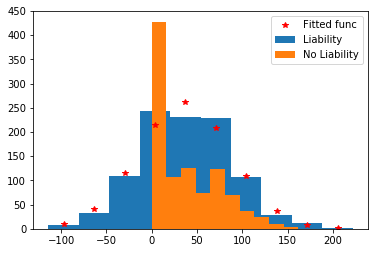

In [7]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
M = 36
dM = 6
students1 = np.full(N, M)
students2 = np.full(N, M)
    
def play_a(array, dm):
    a = np.random.randint(0, len(array))
    b = np.random.randint(0, len(array))
    
    a_hand = np.random.randint(0, 3)
    b_hand = np.random.randint(0, 3)
    
    if a_hand == 0 and b_hand == 2:
        array[a] += dm
        array[b] -= dm
        
    elif b_hand == 0 and a_hand == 2:
        array[a] -= dm
        array[b] += dm
    
    elif a_hand > b_hand:  
        array[a] += dm
        array[b] -= dm
        
    elif a_hand < b_hand:
        array[a] -= dm
        array[b] += dm
    else :
        pass
    
    return array

def play_b(array, dm):
    a = np.random.randint(0, len(array))
    b = np.random.randint(0, len(array))
    if array[a] <= 0 or array[b] <= 0:
        pass
    else :
        a_hand = np.random.randint(0, 3)
        b_hand = np.random.randint(0, 3)
    
        if a_hand == 0 and b_hand == 2:
            array[a] += dm
            array[b] -= dm
        
        elif b_hand == 0 and a_hand == 2:
            array[a] -= dm
            array[b] += dm
    
        elif a_hand > b_hand:  
            array[a] += dm
            array[b] -= dm
        
        elif a_hand < b_hand:
            array[a] -= dm
            array[b] += dm
        else :
            pass
    
    
    return array

for _ in range(50000):
    students1 = play_a(students1, dM)
    students2 = play_b(students2, dM)

a1 = plt.hist(students1, bins = 10, label = "Liability")
print(a1)
dx=(a1[1][1]-a1[1][0])
bin_center = np.array(a1[1][0:-1])+dx/2.
print(bin_center)

from scipy import optimize

def test_func(x,amp,s):
    
    return amp * np.exp(-(x-36)**2/s**2)

params, params_covariance = optimize.curve_fit(test_func, bin_center, a1[0])
print(params, params_covariance)

plt.plot(bin_center, test_func(bin_center,params[0],params[1]),"r*",label='Fitted func')
plt.hist(students2, bins = 10, label = "No Liability")
plt.legend(loc = "best")
plt.show()